In [1]:
import pandas_datareader as pdr
import pandas as pd
from datetime import datetime

In [2]:
import yfinance as yf

start_date = datetime(2017, 2, 17)
end_date = datetime(2022, 2, 24)

df = yf.download('TSLA', start=start_date, end=end_date)
df

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-02-17,17.719999,18.192667,17.610001,18.148666,18.148666,93856500
2017-02-21,18.363333,18.760000,18.267332,18.492666,18.492666,85150500
2017-02-22,18.687332,18.896667,18.173332,18.233999,18.233999,131325000
2017-02-23,17.600000,17.643999,17.037333,17.066000,17.066000,223728000
2017-02-24,16.844000,17.216667,16.680000,17.133333,17.133333,122574000
...,...,...,...,...,...,...
2022-02-16,304.683319,308.809998,300.403320,307.796661,307.796661,51294300
2022-02-17,304.420013,306.166656,291.366669,292.116669,292.116669,55178400
2022-02-18,295.333344,295.623322,279.203339,285.660004,285.660004,68501700


## Simple Moving Average

<Axes: xlabel='Date'>

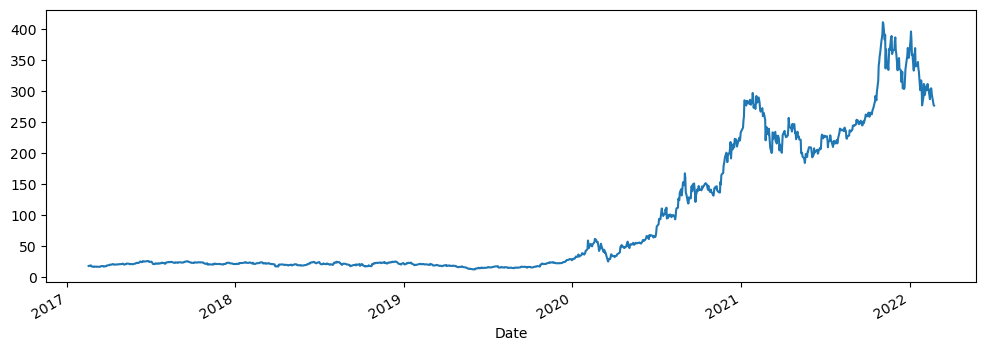

In [5]:
df['Open'].plot(figsize=(12,4))

In [14]:
df['Open:10 days rolling'] = df['Open'].rolling(window=10,min_periods=1).mean()

<Axes: xlabel='Date'>

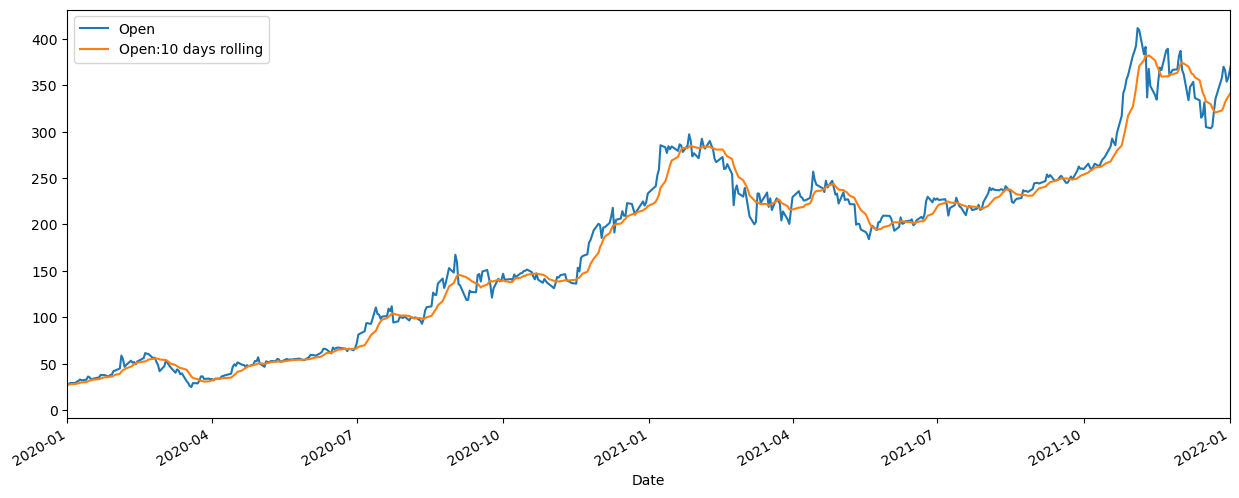

In [21]:
df[['Open', 'Open:10 days rolling']].plot(xlim=['2020-01-01','2022-01-01'],figsize=(15,6))

<Axes: xlabel='Date'>

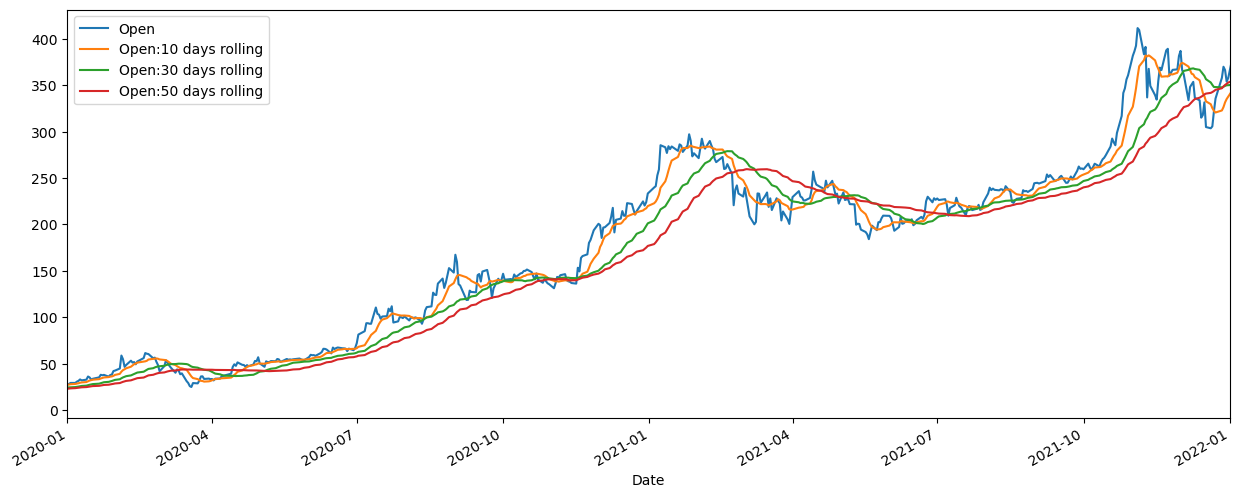

In [22]:
df['Open:10 days rolling'] = df['Open'].rolling(window=10,min_periods=1).mean()
df['Open:30 days rolling'] = df['Open'].rolling(window=30,min_periods=1).mean()
df['Open:50 days rolling'] = df['Open'].rolling(window=50,min_periods=1).mean()
df[['Open', 'Open:10 days rolling','Open:30 days rolling','Open:50 days rolling']].plot(xlim=['2020-01-01','2022-01-01'],figsize=(15,6))

## Expanding (in CMA- Cummilative Moving Average)

TypeError: 'Axes' object is not callable

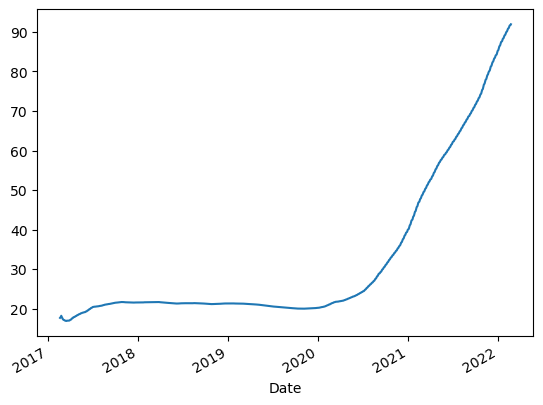

In [23]:
df['Open'].expanding().mean().plot()(figsize=(15,6))

## Exponential  Moving Average

In [25]:
 # let smoothening factor=0.1
df['Ema_0.1'] = df['Open'].ewm(alpha=0.1,adjust=False).mean()

<Axes: xlabel='Date'>

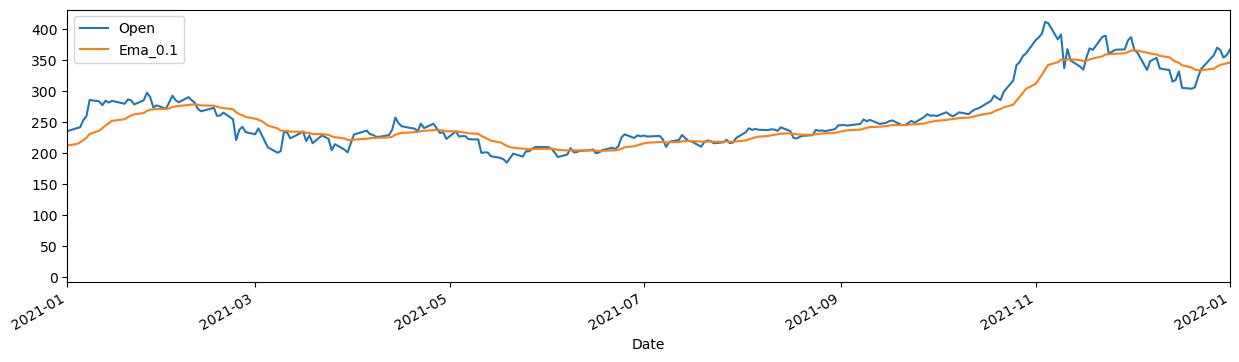

In [27]:
df[['Open','Ema_0.1']].plot(xlim=['2021-01-01','2022-01-01'],figsize=(15,4))

<Axes: xlabel='Date'>

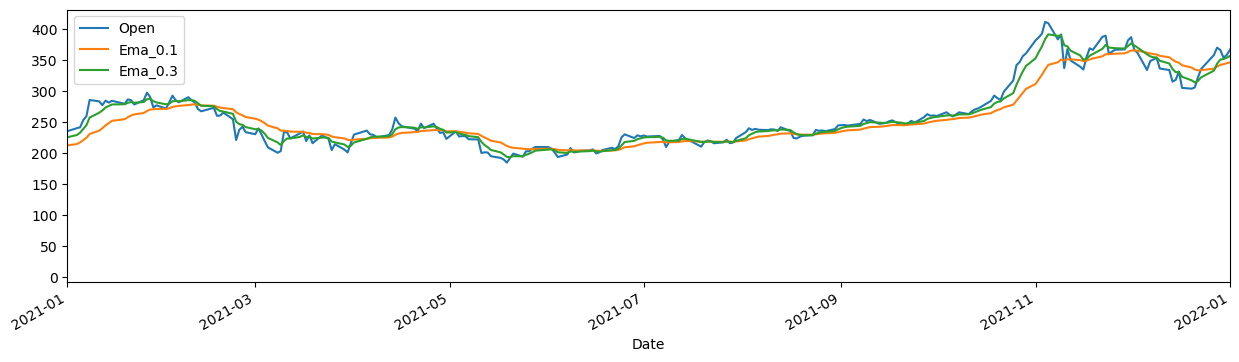

In [28]:
df['Ema_0.1'] = df['Open'].ewm(alpha=0.1,adjust=False).mean()
df['Ema_0.3'] = df['Open'].ewm(alpha=0.3,adjust=False).mean()
df[['Open','Ema_0.1','Ema_0.3']].plot(xlim=['2021-01-01','2022-01-01'],figsize=(15,4))
#green one is more better than orange when is it blends nicely

## Exponential Weighted Moving Avg

In [30]:
df['Ema 5 days'] = df['Open'].ewm(span=5,adjust=False).mean()

<Axes: xlabel='Date'>

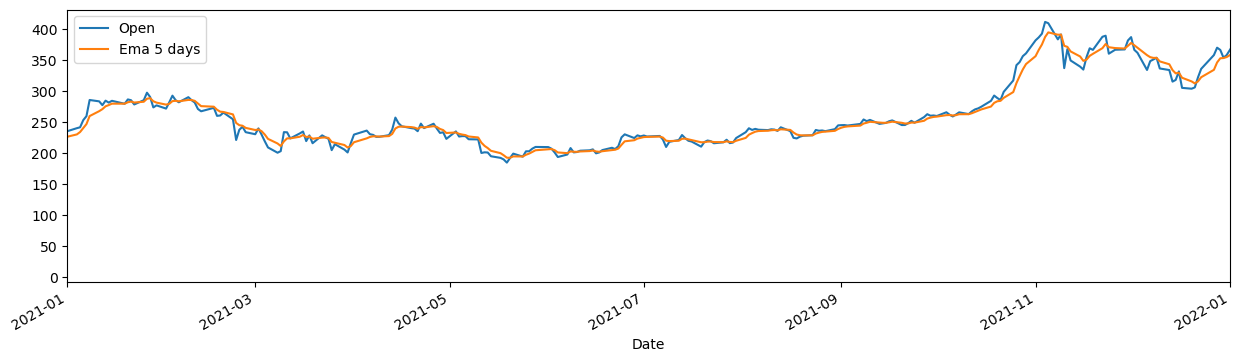

In [31]:
df[['Open','Ema 5 days']].plot(xlim=['2021-01-01','2022-01-01'],figsize=(15,4))